In [18]:
# 모델 정의
from sklearn.ensemble import RandomForestClassifier

random_classifier = RandomForestClassifier()

In [19]:
random_classifier

RandomForestClassifier()

In [20]:
# 데이터 불러오기
import pandas as pd

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [21]:
# 데이터 전처리
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# MinMaxScailing
scaler = MinMaxScaler()
scaler.fit(train[['fixed acidity']])
train['Scaled fixed acidity'] = scaler.transform(train[['fixed acidity']])

# Ont-hot encoding
encoder = OneHotEncoder()
encoder.fit(train[['type']])

onehot = encoder.transform(train[['type']])
onehot = onehot.toarray()
onehot = pd.DataFrame(onehot)
onehot.columns = encoder.get_feature_names()

train = pd.concat([train, onehot], axis = 1)
train = train.drop(columns = ['type'])

In [22]:
train

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Scaled fixed acidity,x0_red,x0_white
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0.148760,0.0,1.0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0.413223,1.0,0.0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0.338843,0.0,1.0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0.264463,0.0,1.0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0.330579,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,0.322314,0.0,1.0
5493,5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,0.206612,0.0,1.0
5494,5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,0.330579,0.0,1.0
5495,5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,0.231405,0.0,1.0


In [23]:
X = train.drop(columns = ['quality'])
Y = train['quality']

In [26]:
random_classifier.fit(X, Y)

RandomForestClassifier()

In [34]:
# 교차 검증
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, shuffle = True, random_state = 0)

for train_idx, valid_idx in kf.split(train):
    train_data = train.iloc[train_idx]
    valid_data = train.iloc[valid_idx]

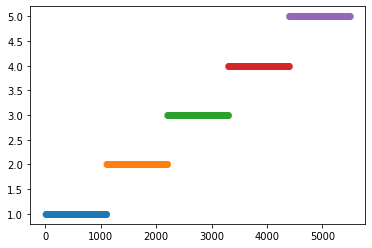

In [46]:
# 교차 검증 데이터 시각화
import matplotlib.pyplot as plt

kf = KFold(n_splits = 5, shuffle = False)
train_idx_store = []
valid_idx_store = []

i = 1
for train_idx, valid_idx in kf.split(train):
    plt.scatter(valid_idx, [i for x in range(len(valid_idx))], alpha = 0.1)
    i += 1
plt.show()

In [48]:
X = train.drop(columns = ['index', 'quality'])
Y = train['quality']

kf = KFold(n_splits = 5, shuffle = True, random_state = 0)

In [49]:
model = RandomForestClassifier(random_state = 0)
valid_scores = []
test_predictions = []

In [52]:
import numpy as np
from sklearn.metrics import accuracy_score

for train_idx, valid_idx in kf.split(X, Y):
    X_tr = X.iloc[train_idx]
    Y_tr = Y.iloc[train_idx]
    X_val = X.iloc[valid_idx]
    Y_val = Y.iloc[valid_idx]
    model.fit(X_tr, Y_tr)
    
    valid_prediction = model.predict(X_val)
    score = accuracy_score(Y_val, valid_prediction)
    valid_scores.append(score)
    print(score)
    print('평균 점수 :', np.mean(valid_scores))

0.69
평균 점수 : 0.69
0.6663636363636364
평균 점수 : 0.6821212121212121
0.6569608735213831
평균 점수 : 0.6758311274712548
0.6760691537761602
평균 점수 : 0.675878732732236
0.6715195632393085
평균 점수 : 0.6751522044834147


In [58]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Scailing
scaler = MinMaxScaler()
scaler.fit(train[['fixed acidity']])
train['Scaled fixed acidity'] = scaler.transform(train[['fixed acidity']])
test['Scaled fixed acidity'] = scaler.transform(test[['fixed acidity']])

# Encoding
encoder = OneHotEncoder()
encoder.fit(train[['type']])

onehot = encoder.transform(train[['type']])
onehot = onehot.toarray()
onehot = pd.DataFrame(onehot)
onehot.columns = encoder.get_feature_names()
train = pd.concat([train, onehot], axis = 1)
train = train.drop(columns = ['type'])

onehot = encoder.transform(test[['type']])
onehot = onehot.toarray()
onehot = pd.DataFrame(onehot)
onehot.columns = encoder.get_feature_names()
test = pd.concat([test, onehot], axis = 1)
test = test.drop(columns = ['type'])

In [59]:
for train_idx, valid_idx in kf.split(X, Y):
    X_tr = X.iloc[train_idx]
    Y_tr = Y.iloc[train_idx]
    X_val = X.iloc[valid_idx]
    Y_val = Y.iloc[valid_idx]
    model.fit(X_tr, Y_tr)
    
    test_prediction = model.predict(test.drop(columns = ['index']))
    test_predictions.append(test_prediction)

In [61]:
test_predictions = pd.DataFrame(test_predictions)

In [63]:
test_prediction = test_predictions.mode()

In [67]:
test_prediction = test_predictions.values[0]

In [71]:
sample_submission = pd.read_csv('data/sample_submission.csv')
sample_submission['quality'] = test_prediction
sample_submission.to_csv('data/submission_KFOLD.csv', index = False)

In [72]:
# Bayesian Optimization
from bayes_opt import BayesianOptimization

X = train.drop(columns = ['index', 'quality'])
Y = train['quality']

rf_parameter_bounds = {
    'max_depth': (1, 3),
    'n_estimators': (30, 100)
}

In [77]:
from sklearn.model_selection import train_test_split

def rf_bo(max_depth, n_estimators):
    rf_params = {
        'max_depth': int(round(max_depth)),
        'n_estimators': int(round(n_estimators))
    }
    
    rf = RandomForestClassifier(**rf_params)
    
    X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.2)
    
    rf.fit(X_train, Y_train)
    score = accuracy_score(Y_valid, rf.predict(X_valid))
    return score

In [78]:
BO_rf = BayesianOptimization(f = rf_bo, pbounds = rf_parameter_bounds, random_state = 0)
BO_rf.maximize(init_points = 5, n_iter = 5)

|   iter    |  target   | max_depth | n_esti... |
-------------------------------------------------
|  1        |  0.5327   |  2.098    |  80.06    |
|  2        |  0.54     |  2.206    |  68.14    |
|  3        |  0.5082   |  1.847    |  75.21    |
|  4        |  0.5336   |  1.875    |  92.42    |
|  5        |  0.5209   |  2.927    |  56.84    |
|  6        |  0.4573   |  1.018    |  48.01    |
|  7        |  0.5264   |  2.07     |  80.1     |
|  8        |  0.5227   |  2.213    |  68.18    |
|  9        |  0.5155   |  2.142    |  68.02    |
|  10       |  0.5373   |  2.24     |  68.19    |


In [79]:
max_params = BO_rf.max['params']
max_params['max_depth'] = int(max_params['max_depth'])
max_params['n_estimators'] = int(max_params['n_estimators'])
print(max_params)

BO_tuend_rf = RandomForestClassifier(**max_params)

{'max_depth': 2, 'n_estimators': 68}
